# Problem statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
#loading dataset

data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
data.shape

(7043, 21)

In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# Checking for null values in dataset

data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- there are no null values present

**Checking for duplicate values in dataset.**

In [8]:
data.duplicated().sum()

0

- There are no duplicate entries present in dataset

In [8]:
data['customerID'].value_counts()

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

- customerID column consists of unique ID's for each customer. Hence this is not useful data in model building, Hence this data will be dropped.

In [9]:
#dropping 'customerID' column

data.drop(['customerID'],axis=1,inplace=True)

In [10]:
data['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

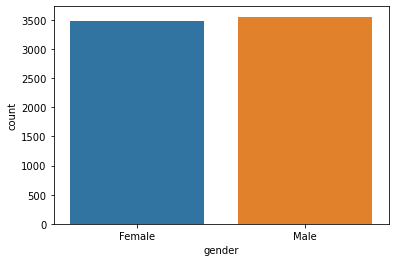

In [11]:
sns.countplot(data['gender'])

There are almost equal number of males and females who stopped using companys telecomminication service.

In [12]:
data['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

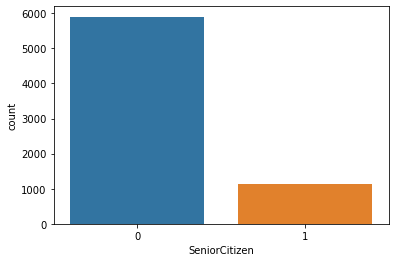

In [13]:
sns.countplot(data['SeniorCitizen'])

- There were approx 1000 senior citizens present and majority being non-senior citizens.

In [14]:
data['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

<AxesSubplot:xlabel='Partner', ylabel='count'>

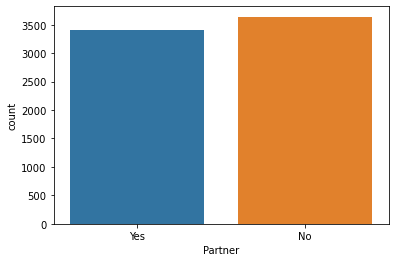

In [15]:
sns.countplot(data['Partner'])

- The plot suggests that there were more number of people with partners.

In [16]:
data['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

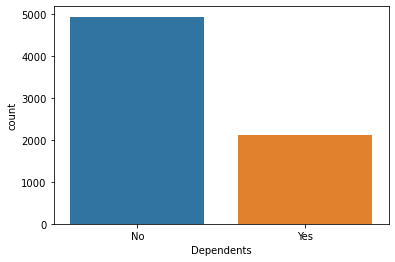

In [17]:
sns.countplot(data['Dependents'])

- The above plot shows that there are less number of dependents fir customer.

In [18]:
data['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

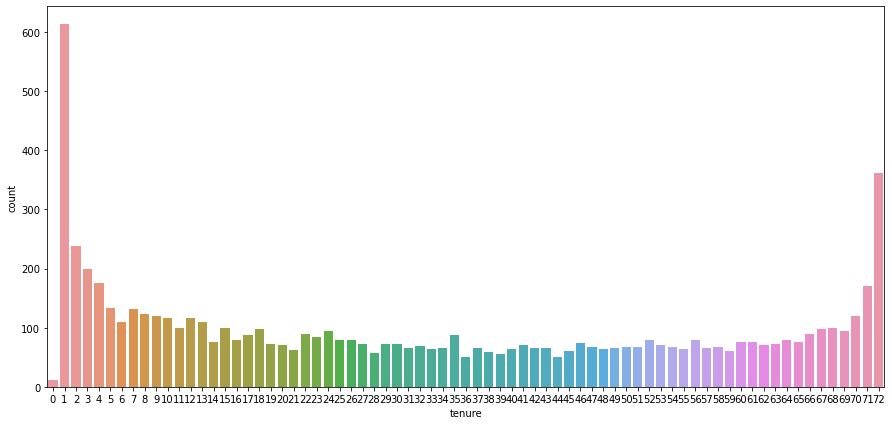

In [19]:
plt.figure(figsize=(15,7))
sns.countplot(data['tenure'])
plt.show()

- It can be seen from above plot that the tenure for service starts from 0-1 month to upto 72 months.
- Most people chose tenure of <1 year followed by 72 months tenure.

In [21]:
data['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

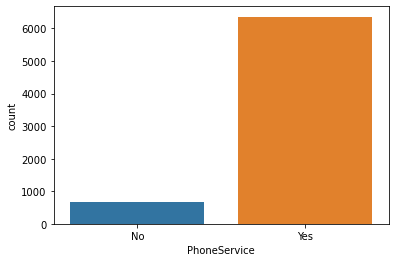

In [22]:
sns.countplot(data['PhoneService'])

- More than 6000 people opted for phone service and only <1000 did not.

In [23]:
data['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

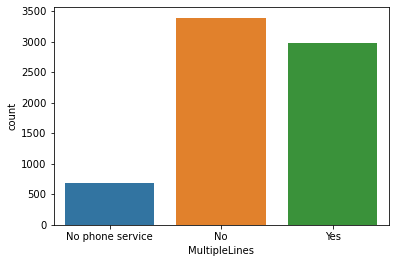

In [24]:
sns.countplot(data['MultipleLines'])

- It can be seen from the plot that very less people did not took phone service. While the people that took phone service, most of them they didnt took multiple line while little less number of people took multiple lines.

In [25]:
data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

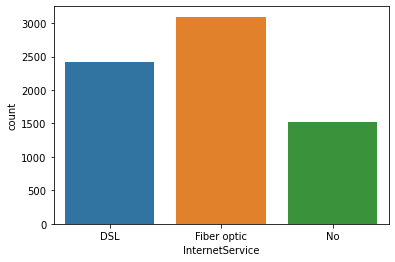

In [26]:
sns.countplot(data['InternetService'])

- Most of the people used fiber optic connection while approx. 2400 people took DSl connection.
- There are approx. 1500 people who did not took internet service.

In [27]:
data['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

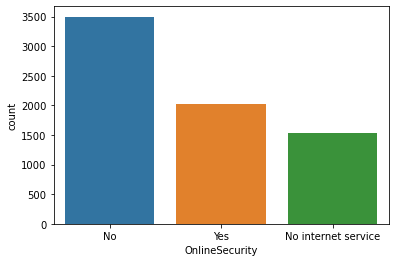

In [28]:
sns.countplot(data['OnlineSecurity'])

- It can be seen from the plot that approx.2000 people subscribed for online security while approx. 3500 people didnt subscribed for online security.

In [29]:
data['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

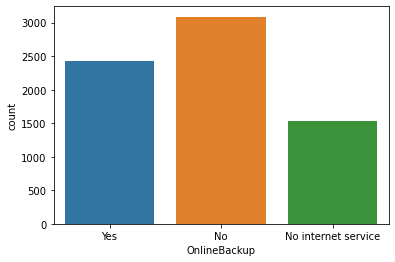

In [30]:
sns.countplot(data['OnlineBackup'])

- Most of the people didnt took online backup service while approx.2400 people took online backup service. 

In [31]:
data['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

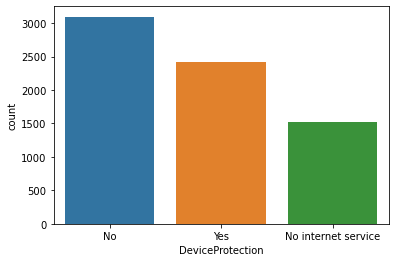

In [32]:
sns.countplot(data['DeviceProtection'])

- Most of the people did not took Device protection service while almost 2400 people took Device protection service.

In [33]:
data['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

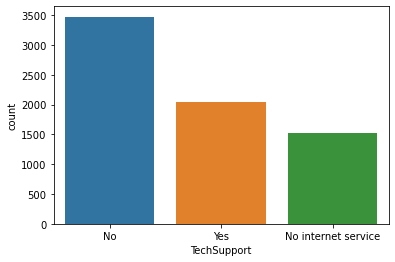

In [34]:
sns.countplot(data['TechSupport'])

- Most of the customers did not took Techsupport service while only approx. 2000 customers took Techsupport services.

In [37]:
data['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

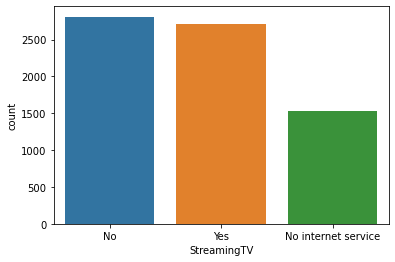

In [36]:
sns.countplot(data['StreamingTV'])

- In above plot we can see that most of the people didnt subscribed for streaming TV service while 2707 number of people subscribed for StreamingTV service.

In [40]:
data['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

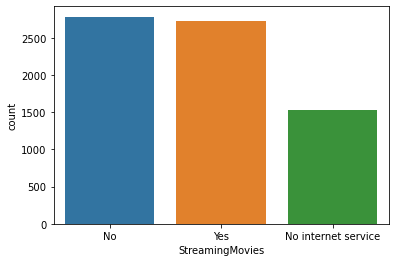

In [39]:
sns.countplot(data['StreamingMovies'])

- 2785 people did not subscribed for Streamingmovies subscription service while little less number of people subscribed for service.

In [41]:
data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<AxesSubplot:xlabel='Contract', ylabel='count'>

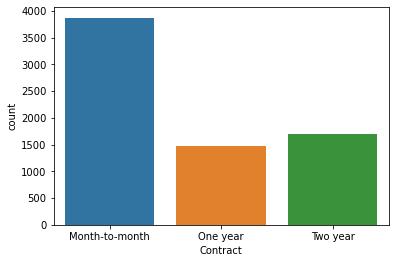

In [42]:
sns.countplot(data['Contract'])

- Most of the people have month to month contract with the service provider, while >1500 people have 2 year contract.
- <1500 people have 1 year contract with service provider.

In [43]:
data['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

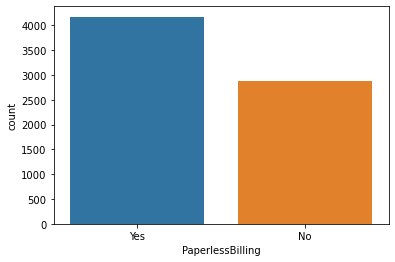

In [44]:
sns.countplot(data['PaperlessBilling'])

- It can be seen from the plot that most customers opted for paperless billing while approx.2750 people still require physical bills.

In [45]:
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

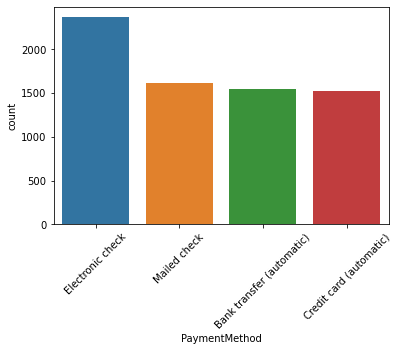

In [54]:
sns.countplot(data['PaymentMethod'])
plt.xticks(rotation=45)
plt.show()

- It can be seen from the plot that most people paid using Electronic checques, while some used mailed cheques.
- Approx. 1500 people opted for automatic payments from their banks i.e. automatic bank transfer and others from their credit cards.

In [56]:
data['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

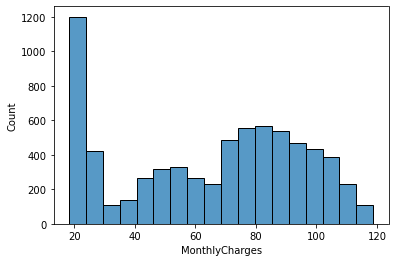

In [55]:
sns.histplot(data['MonthlyCharges'])

- Most people pay monthly charges in the range of 20 USD while there are people who pays upto 120USD monthly for service.

In [65]:
data['Churn'].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot:xlabel='Churn', ylabel='count'>

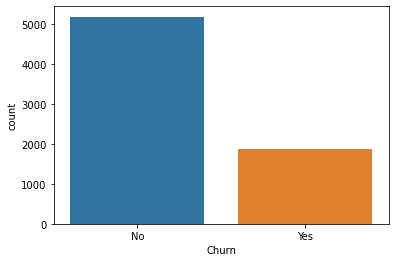

In [52]:
sns.countplot(data['Churn'])

- The above plot shows that more number of customers will be using same service and nearly 2000 people will be churning out from present service provider.

<AxesSubplot:xlabel='gender,Churn'>

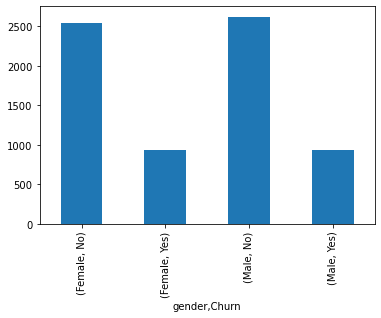

In [78]:
(data.groupby('gender')[['Churn']].value_counts().plot(kind='bar'))

- It can be seen from the plot that less number of females and males will be stopping the service while more number of males then females are going to continue with service provider.

<AxesSubplot:xlabel='SeniorCitizen,Churn'>

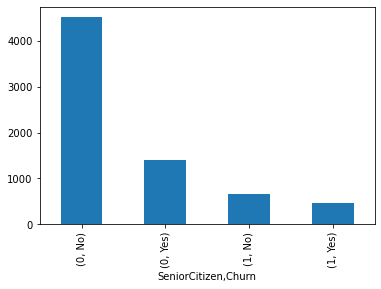

In [79]:
(data.groupby('SeniorCitizen')[['Churn']].value_counts().plot(kind='bar'))

- >4000 non senior citizens will be staying with the present service provider while approx.1200 non senior citizens will be   churing out from present provider.
- More number of senior citizens will be staying with present service provider while less numbers will be churn out.

<AxesSubplot:xlabel='Partner,Churn'>

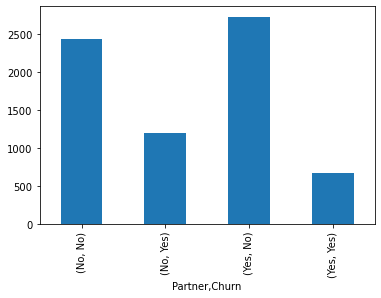

In [81]:
(data.groupby('Partner')[['Churn']].value_counts().plot(kind='bar'))

- It can be seen from the plot that most businesses with partners have higher tendancy of staying with the present provider and vice versa.
- Itt is also seen that >2250 single business owners did not churn out and staying with present service provider. 

<AxesSubplot:xlabel='Dependents,Churn'>

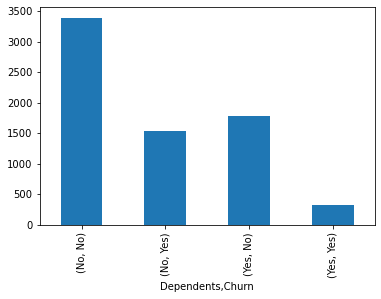

In [85]:
(data.groupby('Dependents')[['Churn']].value_counts().plot(kind='bar'))

- The above plot suggests that in most cases i.e. >3000, if there are no dependents then then there is no churn from service provider while in nearly 1500 cases customer churn is seen.
- It is also seen that in >1500 cases if there are dependents then no customer churn is seen while nearly in 250 cases customer churn is seen when dependents are present.

<AxesSubplot:xlabel='tenure', ylabel='count'>

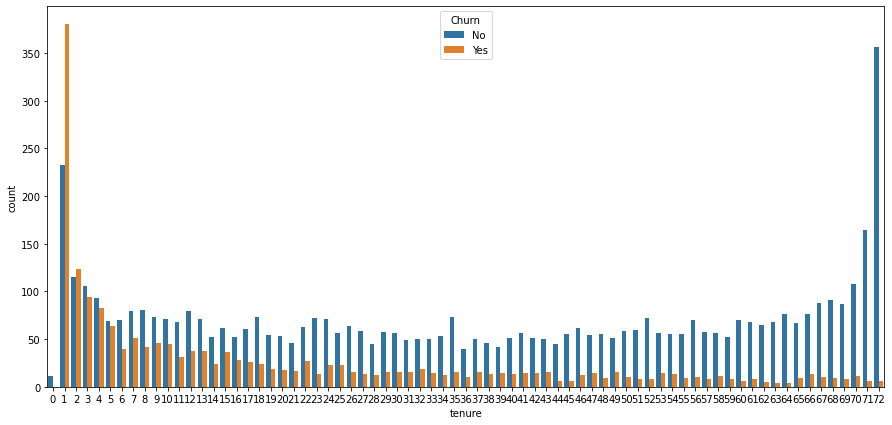

In [95]:
plt.figure(figsize=(15,7))
sns.countplot(x='tenure',hue='Churn',data=data)

- It can be seen from the plot that most customers that churn out have tenure of 1-6 months. The Churning rate goes on decreasing as the tenure increases.
- Highest number of customers not switching to other service providers have tenure of 72 months as seen in plot.

<AxesSubplot:xlabel='MultipleLines,Churn'>

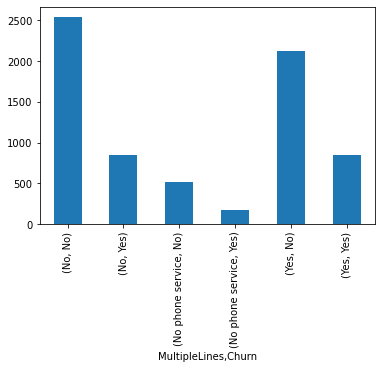

In [98]:
(data.groupby('MultipleLines')[['Churn']].value_counts().plot(kind='bar'))

- In above it can be seen that there are more number of customers who dont have multiple lines and they are not churning out while over 800 custiomers are churning out.
- It can alse be seen that there are some customers who didnt took phone service.

<AxesSubplot:xlabel='PhoneService,Churn'>

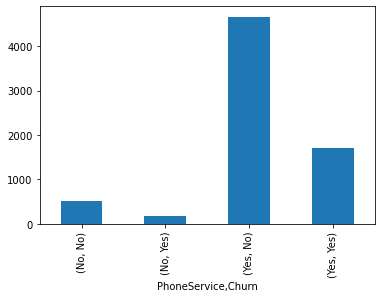

In [99]:
(data.groupby('PhoneService')[['Churn']].value_counts().plot(kind='bar'))

- It can be seen from the plot that most people who use phone service will not be churning while almost 1500 people will churn out that uses phone service.

<AxesSubplot:xlabel='InternetService,Churn'>

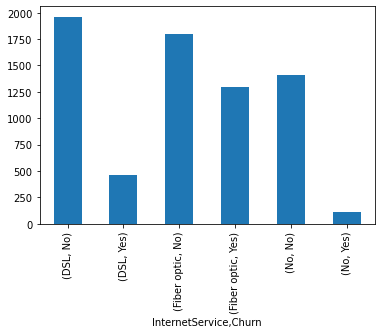

In [100]:
(data.groupby('InternetService')[['Churn']].value_counts().plot(kind='bar'))

- It can be seen from the plot that more people that uses fiber optic and DSL as internet service are likely to stay with present service provider while very less customers does vice versa.

<AxesSubplot:xlabel='OnlineSecurity,Churn'>

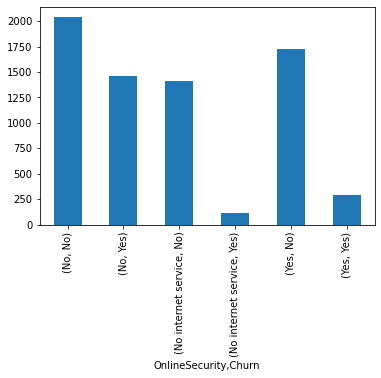

In [101]:
(data.groupby('OnlineSecurity')[['Churn']].value_counts().plot(kind='bar'))

- It can be seen from the plot that almost 1750 people who took Online Security will not churn out while very less people i.e. approx.250 will churn out.

<AxesSubplot:xlabel='OnlineBackup,Churn'>

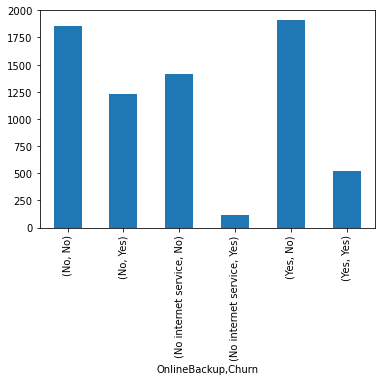

In [102]:
(data.groupby('OnlineBackup')[['Churn']].value_counts().plot(kind='bar'))

- The above plot shows that highest number of customers who subscribed for Online backup will not churn out while  approx. 1250 people who didnt subscrined for Online Backup will churn out.,

<AxesSubplot:xlabel='DeviceProtection,Churn'>

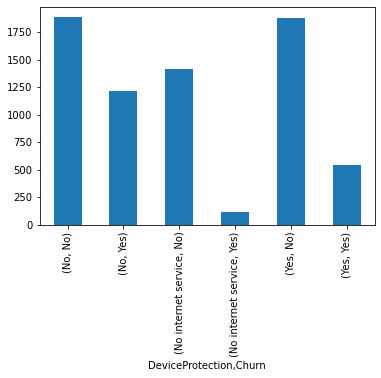

In [103]:
(data.groupby('DeviceProtection')[['Churn']].value_counts().plot(kind='bar'))

- The plot shows that two almost equal amount of customers will not leave service;one being subscriber of Device protection and other not.


<AxesSubplot:xlabel='TechSupport,Churn'>

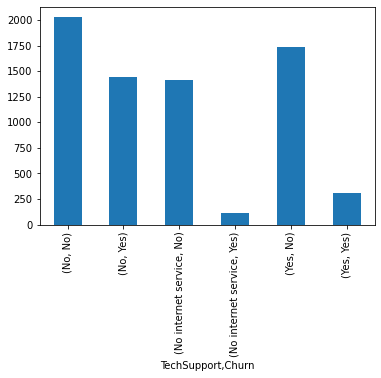

In [104]:
(data.groupby('TechSupport')[['Churn']].value_counts().plot(kind='bar'))

- The above plot shows that approx. 2000 customers who did not subscribed for TechSupport will not churn out while almost 250 customers who subscribed for Tech Support will churn out to different subscribers.

<AxesSubplot:xlabel='StreamingTV,Churn'>

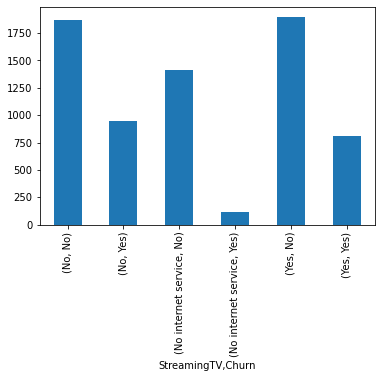

In [105]:
(data.groupby('StreamingTV')[['Churn']].value_counts().plot(kind='bar'))

- It can be seen from the plot that customer who subscribed for Streaming Tv are the most and will not change their service provider while nearly 1000 customers who didnt not subscribed will churn out.

<AxesSubplot:xlabel='StreamingMovies,Churn'>

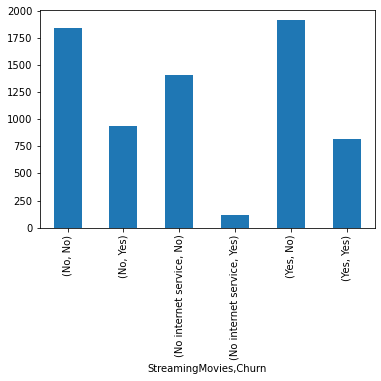

In [106]:
(data.groupby('StreamingMovies')[['Churn']].value_counts().plot(kind='bar'))

- It is seen in above plot that most number of customer that subscribed and not subscribed for Streamimg movies subscription will not churn out to other service. 

<AxesSubplot:xlabel='PaperlessBilling,Churn'>

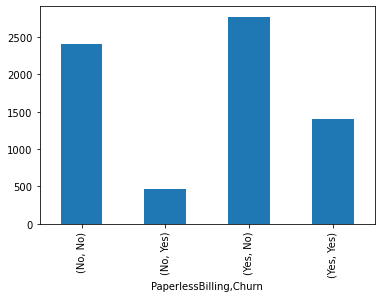

In [107]:
(data.groupby('PaperlessBilling')[['Churn']].value_counts().plot(kind='bar'))

- This plot shows that higher number of customers that opted for paperless billing will not churn out  while very less people who didnt opted to paperless billing churned out.

<AxesSubplot:xlabel='PaymentMethod,Churn'>

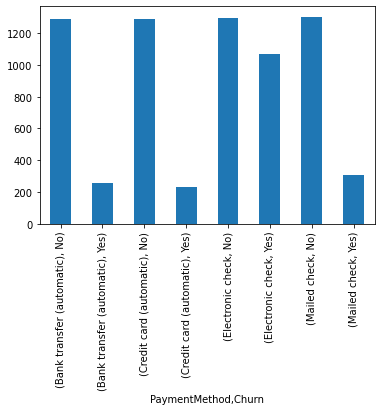

In [108]:
(data.groupby('PaymentMethod')[['Churn']].value_counts().plot(kind='bar'))

- The above plot shows that customers doimg bank tranfer,Credit card payments,electronic and mailed cheques as payment method will not churn out.
- While in one case where customers using electronic chequee as payment method >1000 people churned out.

<AxesSubplot:xlabel='Contract,Churn'>

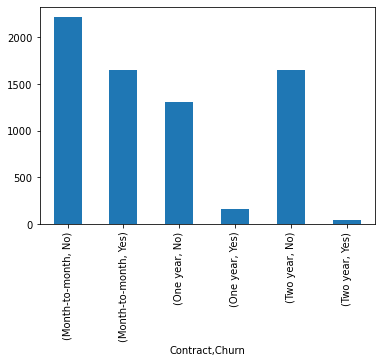

In [109]:
(data.groupby('Contract')[['Churn']].value_counts().plot(kind='bar'))

- Most customers that have month to month contract has higher chancess of not churning out while there are >1500 customers who still churn out.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Churn'>

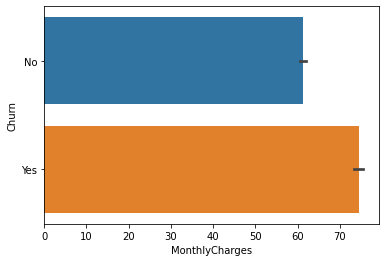

In [113]:
sns.barplot(x='MonthlyCharges',y='Churn',data=data)

- It can be seen from the plot that as the monthly charges increase, chances of customer churning out increases.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

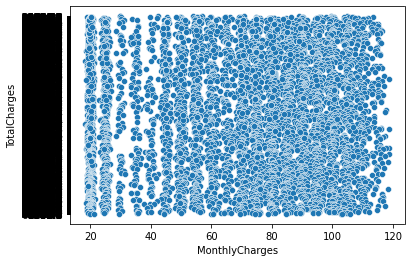

In [116]:
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',data=data)

- There is no relationship seen in above plot when Total charges is plotted with monthly charges.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# Encoding the data using Label Encoder

In [12]:
#importing library for label encoder

from sklearn.preprocessing import LabelEncoder

label_enc=LabelEncoder()

In [13]:
#transforming the data
df1=label_enc.fit_transform(data['gender'])
df2=label_enc.fit_transform(data['SeniorCitizen'])
df3=label_enc.fit_transform(data['Partner'])
df4=label_enc.fit_transform(data['Dependents'])
df5=label_enc.fit_transform(data['tenure'])
df6=label_enc.fit_transform(data['PhoneService'])
df7=label_enc.fit_transform(data['MultipleLines'])
df8=label_enc.fit_transform(data['InternetService'])
df9=label_enc.fit_transform(data['OnlineSecurity'])
df10=label_enc.fit_transform(data['OnlineBackup'])
df11=label_enc.fit_transform(data['DeviceProtection'])
df12=label_enc.fit_transform(data['TechSupport'])
df13=label_enc.fit_transform(data['StreamingTV'])
df14=label_enc.fit_transform(data['StreamingMovies'])
df15=label_enc.fit_transform(data['Contract'])
df16=label_enc.fit_transform(data['PaperlessBilling'])
df17=label_enc.fit_transform(data['PaymentMethod'])
df18=label_enc.fit_transform(data['Churn'])

In [14]:
data['gender']=df1
data['SeniorCitizen']=df2
data['Partner']=df3
data['Dependents']=df4
data['tenure']=df5
data['PhoneService']=df6
data['MultipleLines']=df7
data['InternetService']=df8
data['OnlineSecurity']=df9
data['OnlineBackup']=df10
data['DeviceProtection']=df11
data['TechSupport']=df12
data['StreamingTV']=df13
data['StreamingMovies']=df14
data['Contract']=df15
data['PaperlessBilling']=df16
data['PaymentMethod']=df17
data['Churn']=df18

In [42]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [43]:
data.shape

(7043, 20)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [49]:
# Object type for Total Charges is seen, hence checking if column is having any animalies.
# Checking for empty spaces if present in column

data.loc[data['TotalCharges']==(' ')]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,0,0,1,1,0,0,1,0,2,0,2,2,2,0,2,1,0,52.55,,0
753,1,0,0,1,0,1,0,2,1,1,1,1,1,1,2,0,3,20.25,,0
936,0,0,1,1,0,1,0,0,2,2,2,0,2,2,2,0,3,80.85,,0
1082,1,0,1,1,0,1,2,2,1,1,1,1,1,1,2,0,3,25.75,,0
1340,0,0,1,1,0,0,1,0,2,2,2,2,2,0,2,0,1,56.05,,0
3331,1,0,1,1,0,1,0,2,1,1,1,1,1,1,2,0,3,19.85,,0
3826,1,0,1,1,0,1,2,2,1,1,1,1,1,1,2,0,3,25.35,,0
4380,0,0,1,1,0,1,0,2,1,1,1,1,1,1,2,0,3,20.00,,0
5218,1,0,1,1,0,1,0,2,1,1,1,1,1,1,1,1,3,19.70,,0
6670,0,0,1,1,0,1,2,0,0,2,2,2,2,0,2,0,3,73.35,,0


- It looks like there are empty spaces in that column and hence treating them.

In [51]:
#Filling the empty spaces by 1st converting them to null values and then filling the column with mean of column

data['TotalCharges']=data['TotalCharges'].replace(' ',np.nan)

In [52]:
data['TotalCharges'].isnull().sum()

11

In [64]:
# Changing datatype to float

data['TotalCharges']=data['TotalCharges'].astype('float')

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [66]:
data['TotalCharges']=data['TotalCharges'].fillna(data['TotalCharges'].mean())

In [67]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


**Plotting correlation matrix for above dataset.**

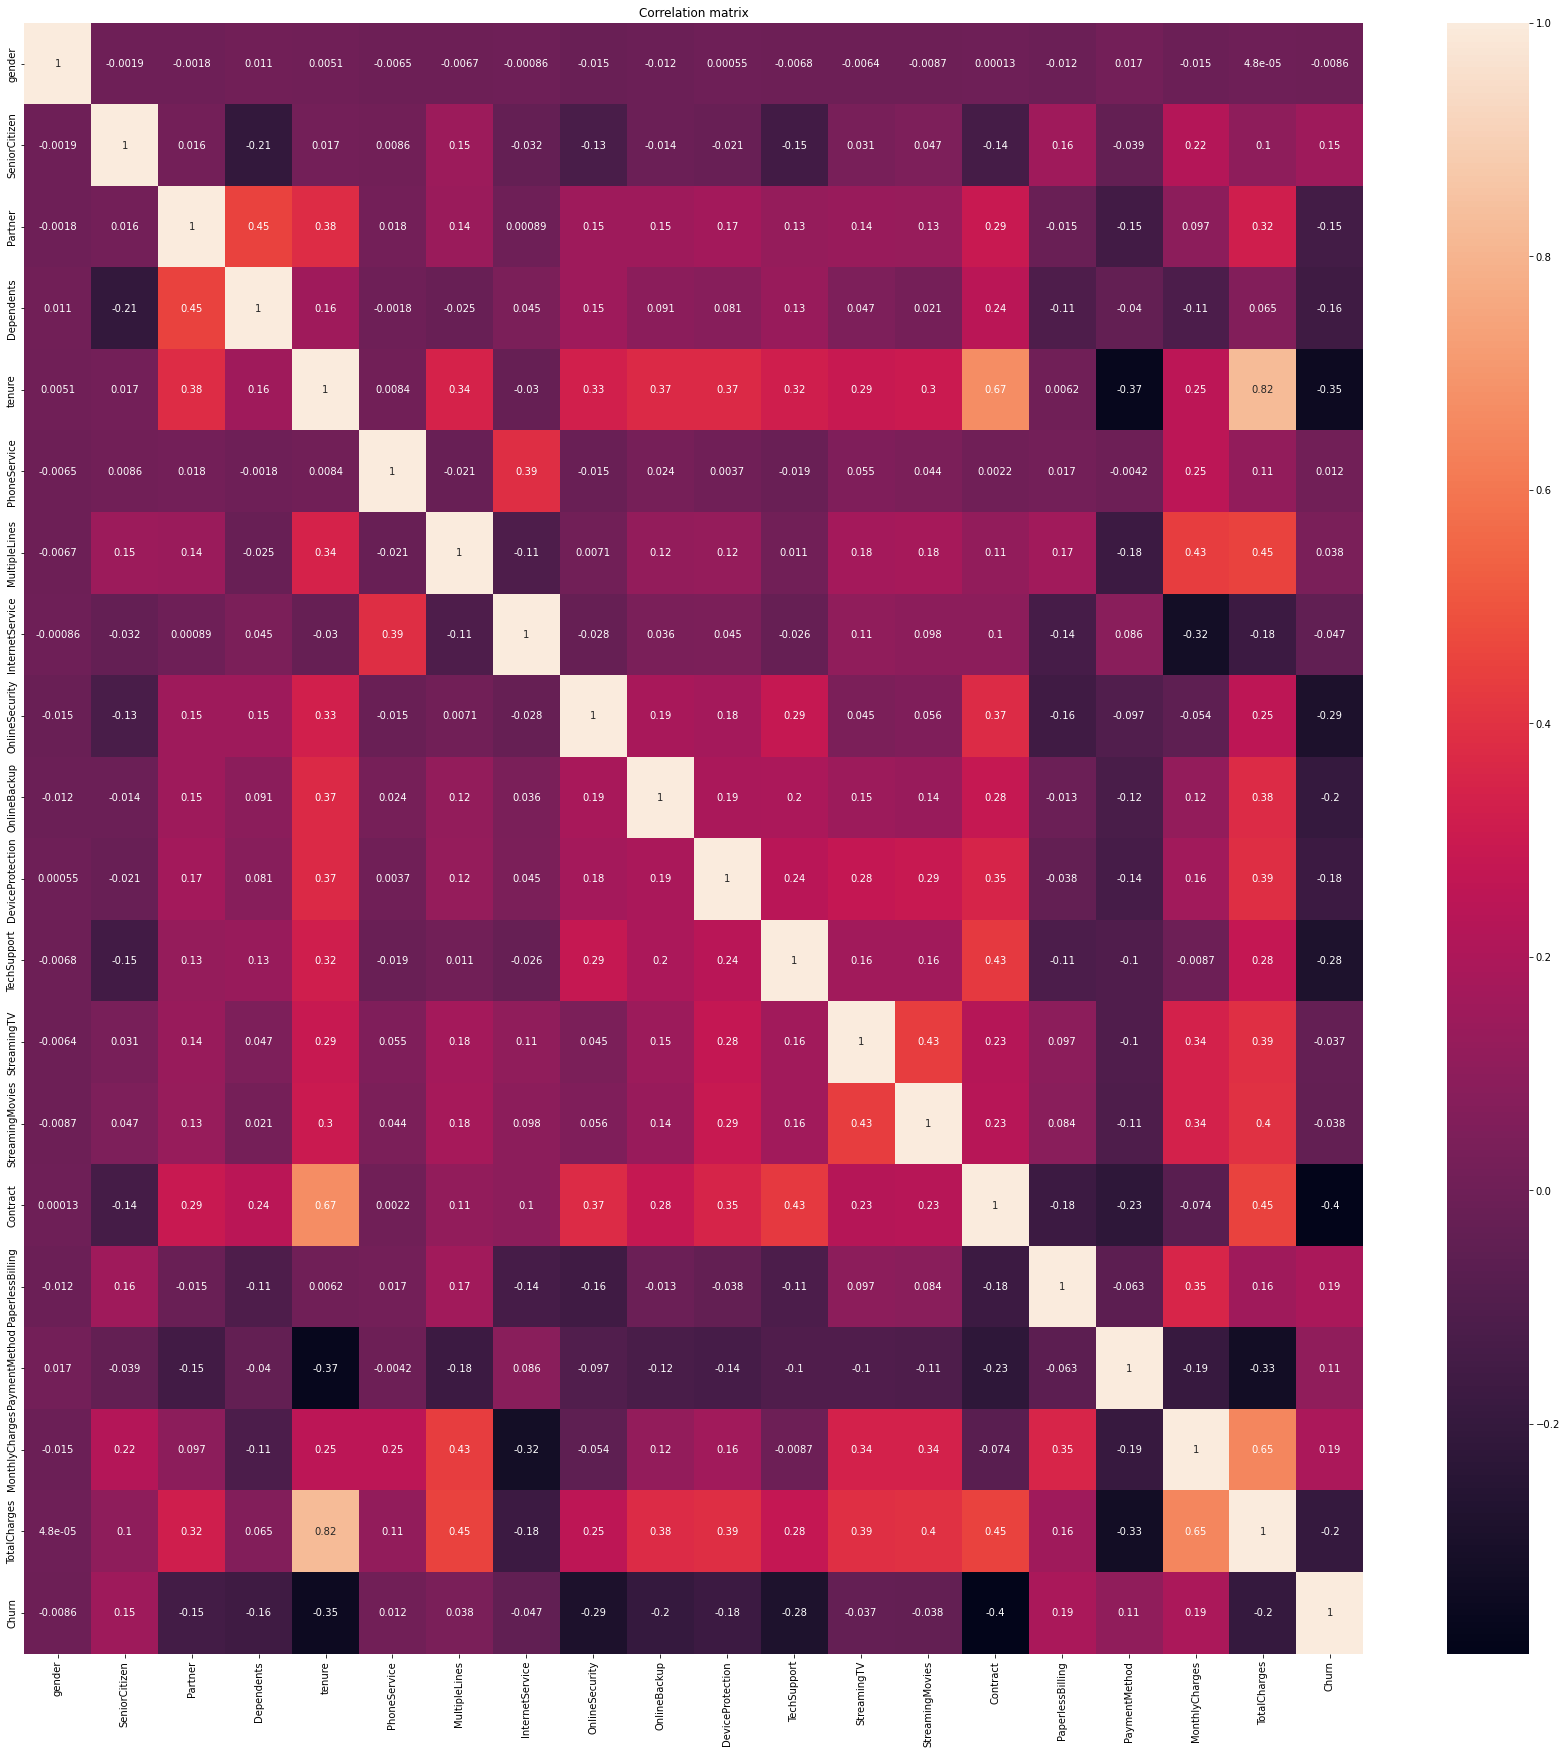

In [68]:
#plotting heatmap

plt.figure(figsize=(30,30))
corr=data.corr()
sns.heatmap(corr,annot=True)
plt.title('Correlation matrix')
plt.show()

- I take 75% as the minimum degree for correlation within features.
- Only total charges is related to tenure at 82%.

<AxesSubplot:xlabel='TotalCharges', ylabel='tenure'>

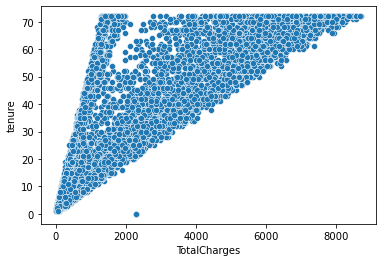

In [69]:
sns.scatterplot(x='TotalCharges',y='tenure',data=data)

- The above plot shows that as tenure of service increases, the Total charges also increases.

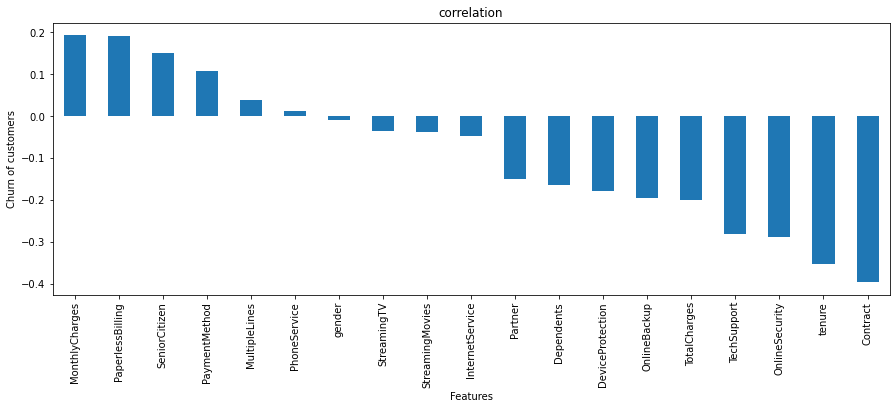

In [70]:
#plotting a coorelation plot that will show relation of features with label(region)

plt.figure(figsize=(15,5))
data.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Churn of customers')
plt.title('correlation')
plt.show()

-It can be seen from the plot that contact column is highest negatively related to label while Monthly charges is highest positively related to label. 

# Checking for outliers in dataset

**Not taking tenure as continuous data as tenure period is usually a fixed number so it cannot be interpreted as continuous data.**

<AxesSubplot:xlabel='MonthlyCharges'>

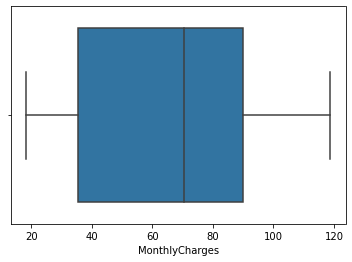

In [73]:
sns.boxplot(data['MonthlyCharges'])

<AxesSubplot:xlabel='TotalCharges'>

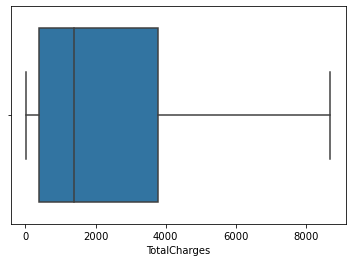

In [74]:
sns.boxplot(data['TotalCharges'])

- there are no outliers seen in above plots hence it can be said that there are no outliers present in dataset.

# Checking for skewness in dataset

In [75]:
data.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

- Only TotalCharges column has skewness present, hence treating them to reduce skewness.


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

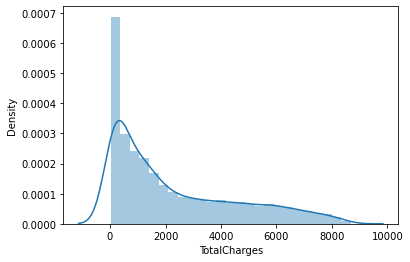

In [76]:
sns.distplot(data['TotalCharges'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

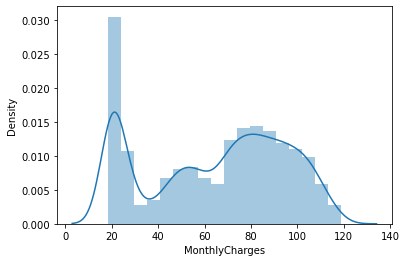

In [77]:
sns.distplot(data['MonthlyCharges'])

- Both the above columns are right skewed but since skewness value for monthly charges is <+-0.5, Hence treating only TotalCharges column.

In [78]:
#log trabsformong to remove skewness

data['TotalCharges']=np.log(data['TotalCharges'])

In [80]:
#skewness values after log trasnforming

data['TotalCharges'].skew()

-0.7558896276917938

# Using Select KBest feature selection method to find best features to build a model.

In [83]:
from sklearn.feature_selection import SelectKBest,f_classif

In [88]:
X=data.drop(['Churn'],axis=1)
Y=data['Churn']

best_features=SelectKBest(score_func=f_classif,k=16)
fit=best_features.fit(X,Y)
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)
feature_score=pd.concat([data_columns,data_scores],axis=1)
feature_score.columns=['Feature Name','Score']
print(feature_score.nlargest(16,'Score'))

        Feature Name        Score
14          Contract  1315.088872
4             tenure   997.268010
8     OnlineSecurity   643.162019
11       TechSupport   610.610024
18      TotalCharges   438.476466
9       OnlineBackup   279.877370
17    MonthlyCharges   273.463704
15  PaperlessBilling   268.985218
10  DeviceProtection   230.744618
3         Dependents   195.149314
1      SeniorCitizen   164.041424
2            Partner   163.060036
16     PaymentMethod    81.641664
7    InternetService    15.782320
13   StreamingMovies    10.447463
6      MultipleLines    10.201712


In [89]:
x=data[[ 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges',]]

In [86]:
#checking for value counts in label column 

Y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

**Applying SMOTE method as value for class 1 in label is undersamppled.**
# Applying SMOTE

In [90]:
#importing library for SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

sm=SMOTE(0.80)

In [91]:
x_new,y_new=sm.fit_resample(x,Y)
print('The no. of classes before fit',format(Counter(Y)))
print('The no. of classes after fit',format(Counter(y_new)))

The no. of classes before fit Counter({0: 5174, 1: 1869})
The no. of classes after fit Counter({0: 5174, 1: 4139})


# Scaling the data

In [93]:
#importing data scaling library
from sklearn.preprocessing import StandardScaler

In [94]:
#Standardizing data

scaler=StandardScaler()

#scaling features

x_scaled=scaler.fit_transform(x_new)

# Model Buiding part

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [96]:
#saving models in variables

rf=RandomForestClassifier()
ab=AdaBoostClassifier()
dt=DecisionTreeClassifier()
gbdt=GradientBoostingClassifier()

The scaled features are saved in **x_scaled** and label data in **y_new**.

In [97]:
#finding best random state for model
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_new,test_size=0.25,random_state=i)
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_train)
    pred=rf.predict(x_test)
    print('training accuracy is ',(accuracy_score(y_train,y_pred)*100),' for random state ',i)
    print('testing accuracy is ',(accuracy_score(y_test,pred)*100),' for random state ',i)
    print('\n')

training accuracy is  99.7709049255441  for random state  0
testing accuracy is  82.18119364534134  for random state  0


training accuracy is  99.79954180985109  for random state  1
testing accuracy is  82.73937312151138  for random state  1


training accuracy is  99.82817869415808  for random state  2
testing accuracy is  83.55517389437527  for random state  2


training accuracy is  99.79954180985109  for random state  3
testing accuracy is  84.02747960498068  for random state  3


training accuracy is  99.85681557846506  for random state  4
testing accuracy is  83.42636324602833  for random state  4


training accuracy is  99.7852233676976  for random state  5
testing accuracy is  82.8681837698583  for random state  5


training accuracy is  99.81386025200459  for random state  6
testing accuracy is  82.78231000429369  for random state  6


training accuracy is  99.81386025200459  for random state  7
testing accuracy is  81.83769858308287  for random state  7


training accuracy i

- Taking 10 as random state for model building.

In [101]:
#initiating train test split thereafter model training
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_new,test_size=0.25,random_state=10)

def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('-----Training score-----')
        print(f'Accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%')
    elif train==False:
        pred=clf.predict(x_test)
        print('-----Testing score-----')
        print(f'Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%')
        print('classification report \n',classification_report (y_test,pred))
        print('confusion matrix ',confusion_matrix(y_test,pred))
        print('F1 Score',f1_score(y_test,pred))

In [102]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [103]:
#passing the function
metric_score(rf,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(rf,x_train,x_test,y_train,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:99.84%
-----Testing score-----
Accuracy score:84.24%
classification report 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1327
           1       0.82      0.82      0.82      1002

    accuracy                           0.84      2329
   macro avg       0.84      0.84      0.84      2329
weighted avg       0.84      0.84      0.84      2329

confusion matrix  [[1143  184]
 [ 183  819]]
F1 Score 0.8169576059850374


In [104]:
#finding best value for cv in provided range
for i in range(2,20):
    cv_score=cross_val_score(rf,x_scaled,y_new,cv=i)
    cv=cv_score.mean()
    print('At cv:-',i)
    print('cross validation score:- ',cv*100)

At cv:- 2
cross validation score:-  80.59738711336517
At cv:- 3
cross validation score:-  83.00282979453382
At cv:- 4
cross validation score:-  82.99201462509905
At cv:- 5
cross validation score:-  83.41143864953389
At cv:- 6
cross validation score:-  83.34634716533567
At cv:- 7
cross validation score:-  83.64837983119224
At cv:- 8
cross validation score:-  83.60400719732165
At cv:- 9
cross validation score:-  83.42228949999533
At cv:- 10
cross validation score:-  84.04552537075368
At cv:- 11
cross validation score:-  83.8099526247935
At cv:- 12
cross validation score:-  83.75444203408121
At cv:- 13
cross validation score:-  83.81085480674083
At cv:- 14
cross validation score:-  83.9594320421388
At cv:- 15
cross validation score:-  83.99149827714578
At cv:- 16
cross validation score:-  83.81871747036598
At cv:- 17
cross validation score:-  84.00275361215357
At cv:- 18
cross validation score:-  83.72632096036351
At cv:- 19
cross validation score:-  84.13109439295067


In [105]:
#cross validation score
print('Cross Validation Score for Random Forest model :- ',((cross_val_score(rf,x_scaled,y_new,cv=19).mean())*100))

Cross Validation Score for Random Forest model :-  84.02409865221681


# Adaboost Classifier

In [106]:
ab.fit(x_train,y_train)

AdaBoostClassifier()

In [107]:
#passing the function
metric_score(ab,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(ab,x_train,x_test,y_train,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:79.81%
-----Testing score-----
Accuracy score:79.95%
classification report 
               precision    recall  f1-score   support

           0       0.84      0.80      0.82      1327
           1       0.75      0.80      0.77      1002

    accuracy                           0.80      2329
   macro avg       0.80      0.80      0.80      2329
weighted avg       0.80      0.80      0.80      2329

confusion matrix  [[1060  267]
 [ 200  802]]
F1 Score 0.7745050700144858


In [108]:
#cross validation score
print('Cross Validation Score for AdaBoost model :- ',((cross_val_score(ab,x_scaled,y_new,cv=19).mean())*100))

Cross Validation Score for AdaBoost model :-  78.92271411726874


# Decision Tree

In [109]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [110]:
#passing the function
metric_score(dt,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(dt,x_train,x_test,y_train,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:99.84%
-----Testing score-----
Accuracy score:77.76%
classification report 
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      1327
           1       0.73      0.76      0.75      1002

    accuracy                           0.78      2329
   macro avg       0.77      0.78      0.77      2329
weighted avg       0.78      0.78      0.78      2329

confusion matrix  [[1051  276]
 [ 242  760]]
F1 Score 0.7458292443572129


In [111]:
#cross validation score
print('Cross Validation Score for Decision Tree model :- ',((cross_val_score(dt,x_scaled,y_new,cv=19).mean())*100))

Cross Validation Score for Decision Tree model :-  77.84971593954336


# Gradient Boosting

In [112]:
gbdt.fit(x_train,y_train)

GradientBoostingClassifier()

In [113]:
#passing the function
metric_score(gbdt,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(gbdt,x_train,x_test,y_train,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:82.19%
-----Testing score-----
Accuracy score:81.41%
classification report 
               precision    recall  f1-score   support

           0       0.85      0.82      0.83      1327
           1       0.77      0.81      0.79      1002

    accuracy                           0.81      2329
   macro avg       0.81      0.81      0.81      2329
weighted avg       0.82      0.81      0.81      2329

confusion matrix  [[1085  242]
 [ 191  811]]
F1 Score 0.7892944038929439


In [114]:
#cross validation score
print('Cross Validation Score for Decision Tree model :- ',((cross_val_score(gbdt,x_scaled,y_new,cv=19).mean())*100))

Cross Validation Score for Decision Tree model :-  80.38346520943033


# Dataframe showing training, testing, F1 score and Cross validation scores with respect to different models

In [116]:
column=pd.DataFrame({'Model':['Random Forests','AdaBoost','Decision Trees','Gradient Boosted Tees',],
                    'Training scores':[99.84,79.81,99.84,82.19],
                    'Testing scores':[84.24,79.95,77.76,81.41],
                    'Cross validation score':[84.02,78.92,77.84,80.38,],
                    'F1 score':[81.69,77.45,74.58,78.92]})
column

,Model,Training scores,Testing scores,Cross validation score,F1 score
0,Random Forests,99.84,84.24,84.02,81.69
1,AdaBoost,79.81,79.95,78.92,77.45
2,Decision Trees,99.84,77.76,77.84,74.58
3,Gradient Boosted Tees,82.19,81.41,80.38,78.92


- Looking at the above fdataframe it can be seen that Random forest has most seen that data hence giving better training score, better training accuracy then other models with good cross validation score.
# Hence Random Forest Classifier model will be hyperparameter tuned.

In [117]:
#importing library for for grid search CV

from sklearn.model_selection import GridSearchCV

In [118]:
grid_param=[{'n_estimators':[10,20,30,40],
           'max_depth':[1,2,3,4,5],
           'criterion':['gini','entropy','log_loss'],
            'min_samples_split':(2,3,4,5),
            'max_features':["sqrt", "log2", None]}]

In [119]:
#saving model in variable
grid=GridSearchCV(RandomForestClassifier(),param_grid=grid_param)

In [120]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [1, 2, 3, 4, 5],
                          'max_features': ['sqrt', 'log2', None],
                          'min_samples_split': (2, 3, 4, 5),
                          'n_estimators': [10, 20, 30, 40]}])

In [121]:
#best parameters for tuning
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'n_estimators': 20}

In [122]:
#using best parameters to train 
rf1=RandomForestClassifier(n_estimators=20,
                           max_depth=5,
                           criterion='entropy',
                           min_samples_split=3,
                           max_features='sqrt')

In [123]:
rf1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=3,
                       n_estimators=20)

In [124]:
#passing the function
metric_score(rf1,x_train,x_test,y_train,y_test,train=True) #for training data
metric_score(rf1,x_train,x_test,y_train,y_test,train=False) # for testing data

-----Training score-----
Accuracy score:78.62%
-----Testing score-----
Accuracy score:78.75%
classification report 
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1327
           1       0.74      0.78      0.76      1002

    accuracy                           0.79      2329
   macro avg       0.78      0.79      0.78      2329
weighted avg       0.79      0.79      0.79      2329

confusion matrix  [[1056  271]
 [ 224  778]]
F1 Score 0.7586543149683082


In [125]:
#cross validation score
print('Cross Validation Score for tuned Random Forest Classifier model :- ',((cross_val_score(rf1,x_scaled,y_new,cv=19).mean())*100))

Cross Validation Score for tuned Random Forest Classifier model :-  78.55751540620535


Original random forest model had seen more data with better test score.

# Hence saving original Random Forest model

# Saving the model using pickle

In [126]:
import pickle

In [127]:
pickle.dump(rf,open('Customer_churn_rf','wb'))